# OPEN CV(이미지 처리)

In [2]:
from PIL import Image, ImageFont, ImageDraw
import numpy as np

import cv2
import matplotlib.pyplot as plt

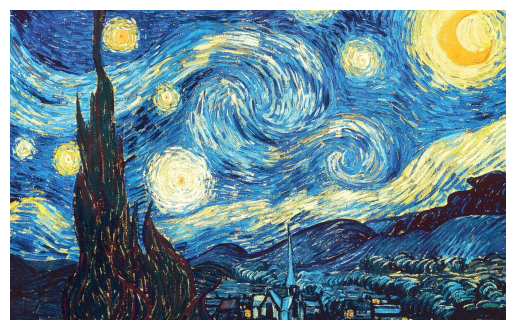

In [33]:
image_path = '../../data/image/cv/starry_night.jpg'

image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

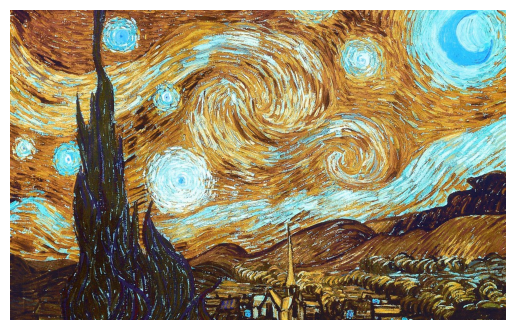

In [34]:
image_cv = cv2.imread(image_path)
plt.imshow(image_cv)
plt.axis("off")
plt.show()

In [35]:
print(np.array(image)[0][0]) # R G B
print(image_cv[0][0]) # B G R

[  6  22 109]
[109  22   6]


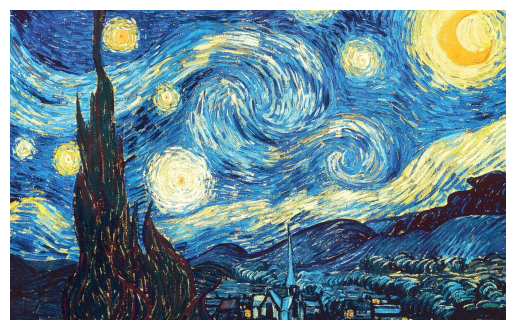

In [36]:
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB) # BGR to RGB
plt.imshow(image_cv)
plt.axis("off")
plt.show()

In [ ]:
print(type(image_cv))
print(image_cv.shape) # H W C(RGB)
print(image_cv.ndim)
print(image_cv.dtype) # numpy는 같은 유형의 data만 가능
print(image_cv.size) # 640 * 1024 * 3

<class 'numpy.ndarray'>
(640, 1024, 3)
3
uint8
1966080


In [ ]:
image_cv2 = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY) # BGR to GRAY
plt.imshow(image_cv2, cmap='gray')
plt.axis("off")
plt.show()

In [46]:
save_path = '../../data/image/cv/starry_night_gray.jpg'
cv2.imwrite(save_path, image_cv2)

True

# 이미지 그리기

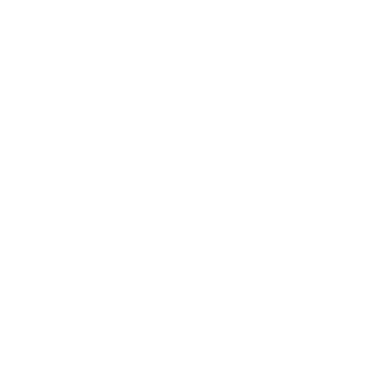

In [9]:
image = np.zeros((400, 400, 3), dtype=np.uint8) + 255

plt.imshow(image)
plt.axis("off")
plt.show()

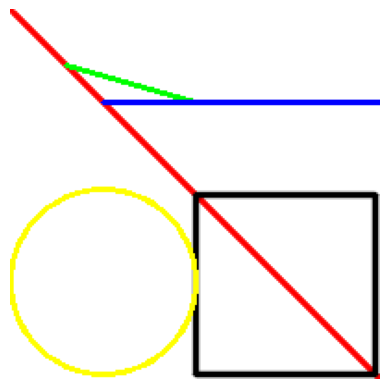

In [51]:
# 베이스
image = np.zeros((200, 200, 3), dtype=np.uint8) + 255

# 베이스 / 좌상단 / 우하단 / 색상 / 굵기 / 종류
cv2.line(image, (0,0), (200,200), (255,0,0), 2, lineType=cv2.LINE_AA)
cv2.line(image, (30,30), (100,50),  (0,255,0), 2, lineType=cv2.LINE_4)
cv2.line(image, (50,50), (200,50),  (0,0,255), 2, lineType=cv2.LINE_8)

cv2.rectangle(image, (100,100), (197,197), (0,0,0), 2, lineType=cv2.LINE_AA)

# 베이스 / 중심점 / 반지름 / 색상 / 두께 
cv2.circle(image, (50, 147), 50, (255, 255, 0), 2)

plt.imshow(image)
plt.axis("off")
plt.show()

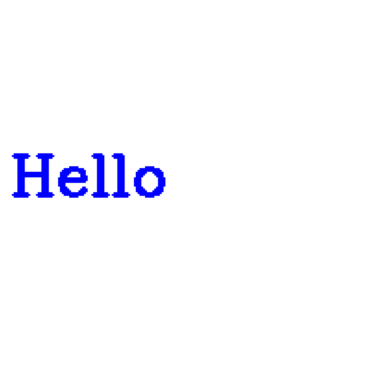

In [59]:
image = np.zeros((200, 200, 3), dtype=np.uint8) + 255

#cv2.putText(image, text='HELLO', (0, 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
cv2.putText(image, text='Hello', org=(0, 100), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1, color=(0,0,255), thickness=2)

plt.imshow(image)
plt.axis("off")
plt.show()

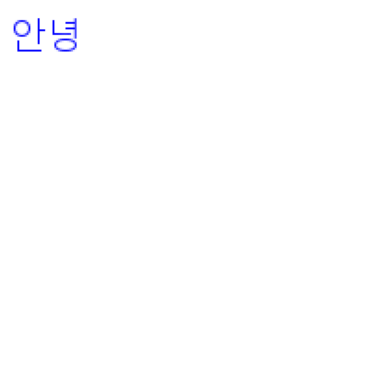

In [57]:
image = np.zeros((200, 200, 3), dtype=np.uint8) + 255

# 한글이 가능하도록 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font = ImageFont.truetype(font_path, 20)

image = Image.fromarray(image) # numpy to Image
draw = ImageDraw.Draw(image) # image draw 준비
draw.text((0, 0), '안녕', (0,0,255), font=font) # image에 text 넣기 
text_image =np.array(image) # image to numpy

plt.imshow(image)
plt.axis("off")
plt.show()

# 마스크 씌우기

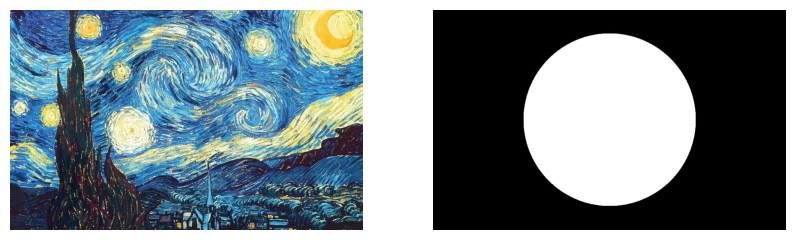

In [105]:
sn_path = '../../data/image/cv/starry_night.jpg'
ci_path = '../../data/image/cv/circle.jpg'

image1 = cv2.imread(sn_path)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(ci_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(image1)
ax[0].axis('off')
ax[1].imshow(image2)
ax[1].axis('off')
plt.show()

(640, 1024, 3) (640, 1024) (640, 1024, 3)


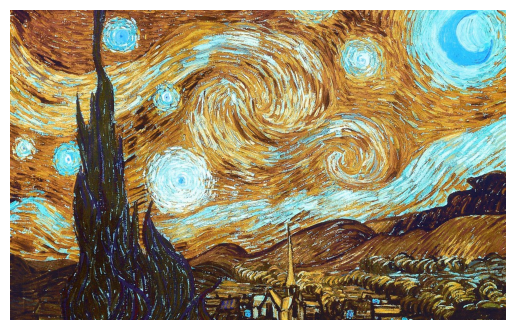

In [73]:
sn_path = '../../data/image/cv/starry_night.jpg'
ci_path = '../../data/image/cv/circle.jpg'

image = cv2.imread(sn_path)
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

mask = cv2.imread(ci_path, cv2.IMREAD_GRAYSCALE)

#dst = np.zeros(image.shape, dtype=np.uint8)
dst = cv2.imread(sn_path)

print(image.shape, mask.shape, dst.shape)

# 이미지에 마스크 씌우기
cv2.copyTo(image, mask, dst) # 원본 / 마스크 / 

plt.imshow(dst)
plt.axis('off')
plt.show()

# 이미지 처리

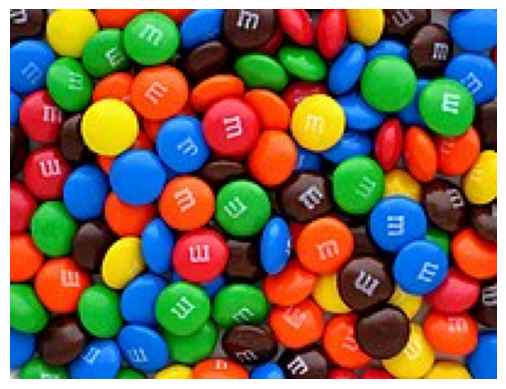

In [89]:
image = cv2.imread('../../data/image/cv/chocolate.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

(152, 200) (152, 200) (152, 200)


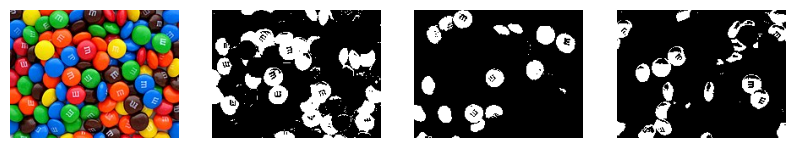

In [ ]:
mask_r = cv2.inRange(image, (128, 0, 0), (255, 128, 128)) # 색상 하한선 < 붉은 계열 <상한선 
mask_g = cv2.inRange(image, (0, 128, 0), (128, 255, 128)) # 색상 하한선 < 초록 계열 <상한선 
mask_b = cv2.inRange(image, (0, 0, 128), (128, 128, 255)) # 색상 하한선 < 푸른 계열 <상한선 

print(mask_r.shape, mask_g.shape, mask_b.shape)

fig, ax = plt.subplots(1, 4, figsize=(10,4))

ax[0].imshow(image)
ax[0].axis('off')
ax[1].imshow(mask_r, cmap='gray')
ax[1].axis('off')
ax[2].imshow(mask_g, cmap='gray')
ax[2].axis('off')
ax[3].imshow(mask_b, cmap='gray')
ax[3].axis('off')

plt.show()

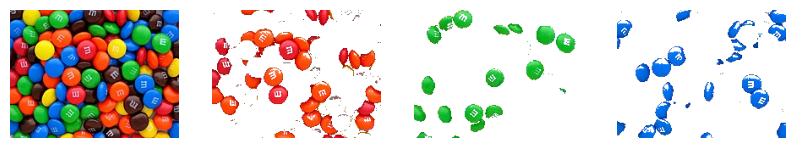

In [ ]:
image = cv2.imread('../../data/image/cv/chocolate.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

white_dst = np.zeros(image.shape, dtype=np.uint8) + 255
image_red = cv2.copyTo(image, mask_r, white_dst) # 원본, 필터 마스크, 바탕 

white_dst = np.zeros(image.shape, dtype=np.uint8) + 255
image_green = cv2.copyTo(image, mask_g, white_dst)

white_dst = np.zeros(image.shape, dtype=np.uint8) + 255
image_blue = cv2.copyTo(image, mask_b, white_dst)

fig, ax = plt.subplots(1, 4, figsize=(10,4))

ax[0].imshow(image)
ax[0].axis('off')
ax[1].imshow(image_red, cmap='gray')
ax[1].axis('off')
ax[2].imshow(image_green, cmap='gray')
ax[2].axis('off')
ax[3].imshow(image_blue, cmap='gray')
ax[3].axis('off')

plt.show()


# 가우시안 블러

In [ ]:
image = cv2.imread('../../data/image/cv/family.jpg')
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

sigma = 10000
image_blur = cv2.GaussianBlur(image, (0,0), sigma)

fig, ax = plt.subplots(1, 2, figsize=(5, 4))
ax[0].imshow(image)
ax[0].axis('off')
ax[1].imshow(image_blur)
ax[1].axis('off')
plt.show()

# 밝기/대비 조절

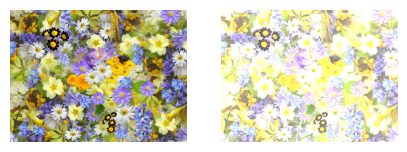

In [15]:
image = cv2.imread('../../data/image/cv/flowers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# alpha : 대비 / beta : 밝기
image_bright= cv2.convertScaleAbs(image, alpha=1, beta=100)  

fig, ax = plt.subplots(1, 2, figsize=(5, 4))
ax[0].imshow(image)
ax[0].axis('off')
ax[1].imshow(image_bright)
ax[1].axis('off')
plt.show()

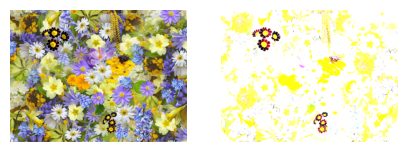

In [18]:
image = cv2.imread('../../data/image/cv/flowers.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_bright= cv2.convertScaleAbs(image, alpha=5, beta=1)  

fig, ax = plt.subplots(1, 2, figsize=(5, 4))
ax[0].imshow(image)
ax[0].axis('off')
ax[1].imshow(image_bright)
ax[1].axis('off')
plt.show()